<a href="https://colab.research.google.com/github/aharahjane/COSC110-Laboratory/blob/main/lab2_titanic_FAUSTINO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Load the dataset
dataPath = '/content/drive/My Drive/Numerical and Symbolic Computation Subj/titanic.csv'
df = pd.read_csv(dataPath)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Understanding the data
df.info()
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
#Checking the missing values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
#Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)  # Fill missing ages with median
df.drop(columns=['Cabin'], inplace=True)  # Drop Cabin due to too many missing values
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  # Fill Embarked with mode

<ipython-input-6-49805ea913fa>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)  # Fill missing ages with median
<ipython-input-6-49805ea913fa>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

In [7]:
#Remove duplicates
df.drop_duplicates(inplace=True)

In [10]:
#fix data types
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')

In [11]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [12]:
# Standardize Column Names
df.columns = df.columns.str.lower()

In [13]:
df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked'],
      dtype='object')

In [14]:
#Save the cleaned dataset
df.to_csv("titanic_cleaned.csv", index=False)

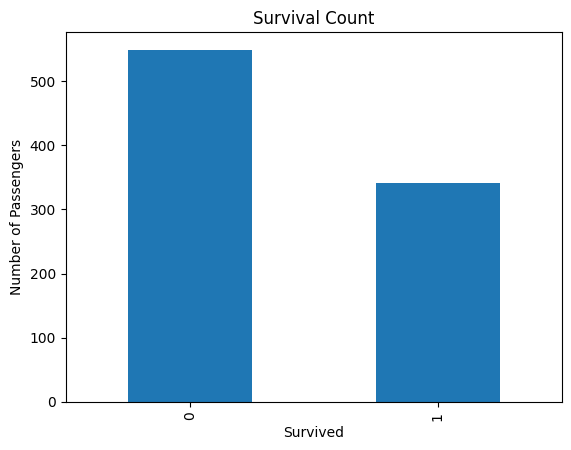

In [15]:
import matplotlib.pyplot as plt

#survival count
df['survived'].value_counts().plot(kind='bar')
plt.title("Survival Count")
plt.xlabel("Survived")
plt.ylabel("Number of Passengers")
plt.show()

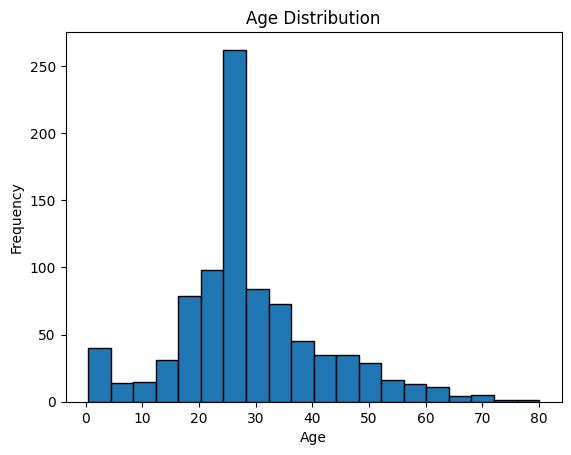

In [16]:
#age distributionn
df['age'].plot(kind='hist', bins=20, edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()

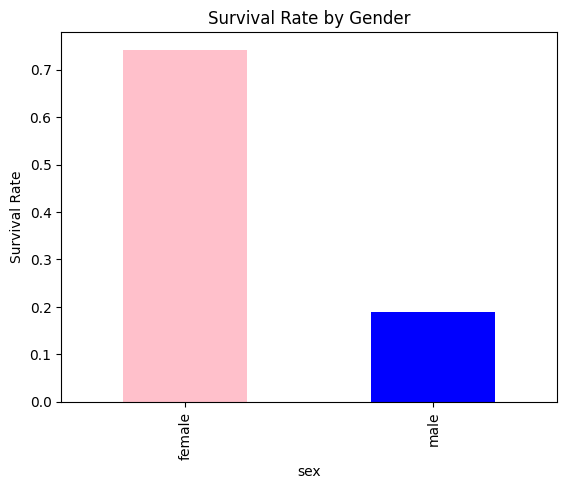

In [20]:
#survival by gender
df['sex'] = df['sex'].astype(str)  # Ensure 'sex' is a string column
df['survived'] = df['survived'].astype(int)  # Convert 'survived' to int for aggregation
df.groupby('sex')['survived'].mean().plot(kind='bar', color=["pink", "blue"])
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.show()

# Lab Questions and Answers

**1. What are your steps in cleaning the dataset? Why did you choose the algorithm that you used in cleaning the dataset?**

  **Answer: The steps for cleaning the dataset included:**

- Handling missing values: The Age column was filled with its median to retain numerical integrity. The Cabin column was dropped because it had too many missing values, making it unreliable. The Embarked column was filled with its mode to maintain consistency.

- Removing duplicates: Duplicates were removed to ensure data accuracy and avoid redundancy.

- Fixing data types: Survived and Pclass were converted into categorical variables for better analysis.

- Standardizing column names: Column names were converted to lowercase for consistency.



# 2. Create at least two (2) basic data analyses on two (2) columns in the dataset.

**1. Survival Rate by Passenger Class**

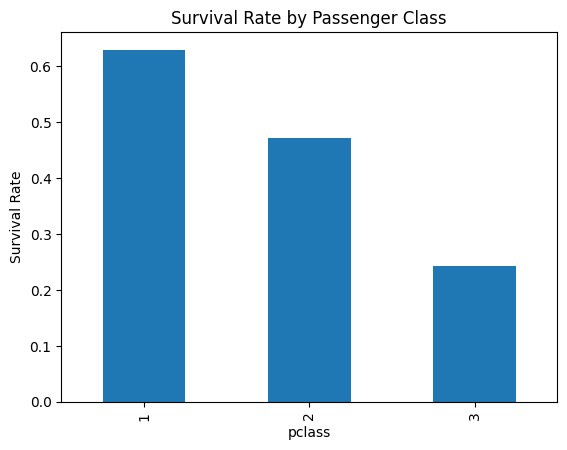

In [22]:
df.groupby('pclass', observed=False)['survived'].mean().plot(kind='bar')
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

**Passengers in higher classes had a higher survival rate, likely due to better access to lifeboats.**

**2. Age vs. Survival**

Younger passengers had a higher survival rate, indicating that children were prioritized during evacuation.